# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [6]:
# if plotnine is not installed in Jupter then use the following command to install it 
#!pip install --user pandas
#>> not working 

Running this project require the following imports 

In [3]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
#from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline

In [4]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



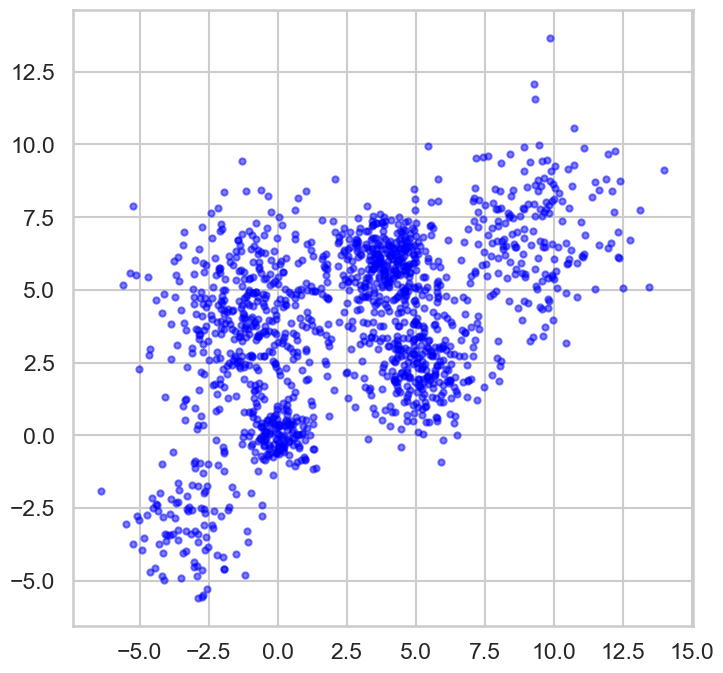

In [5]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

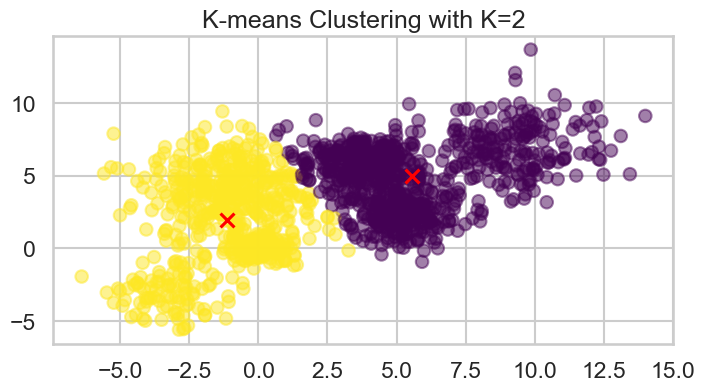

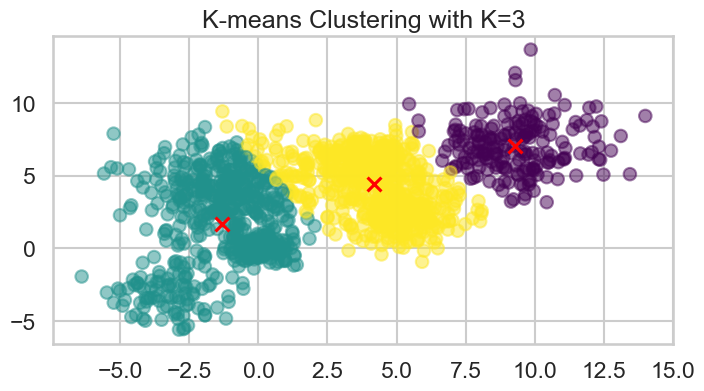

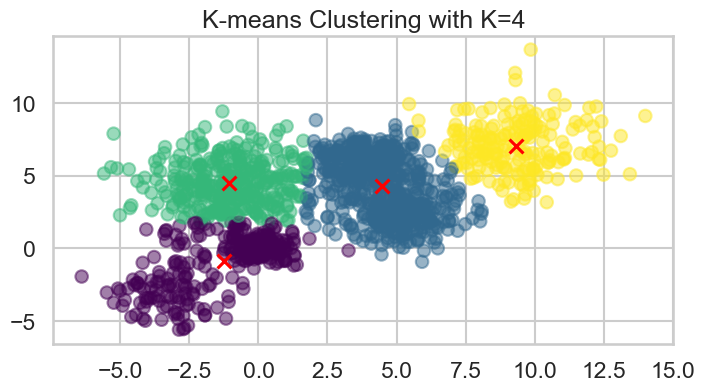

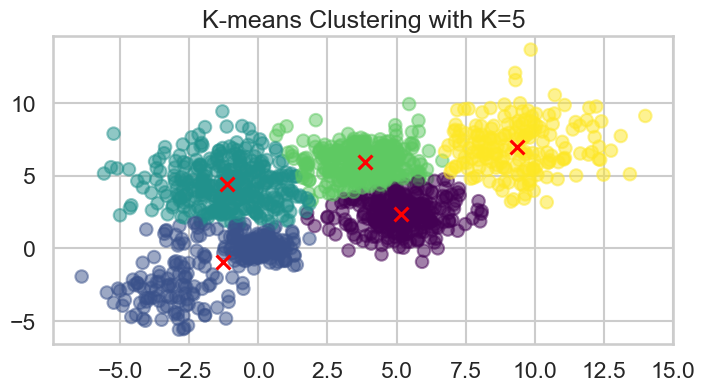

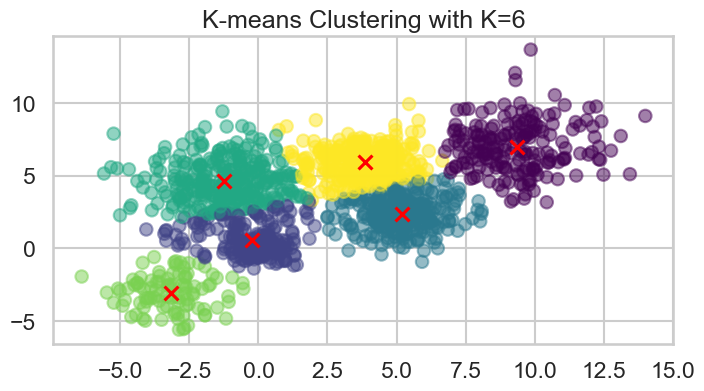

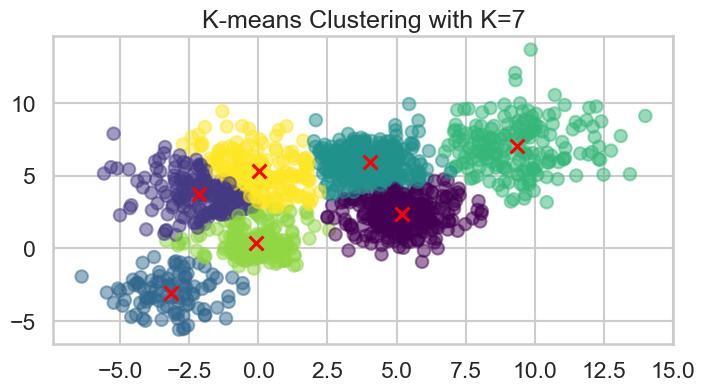

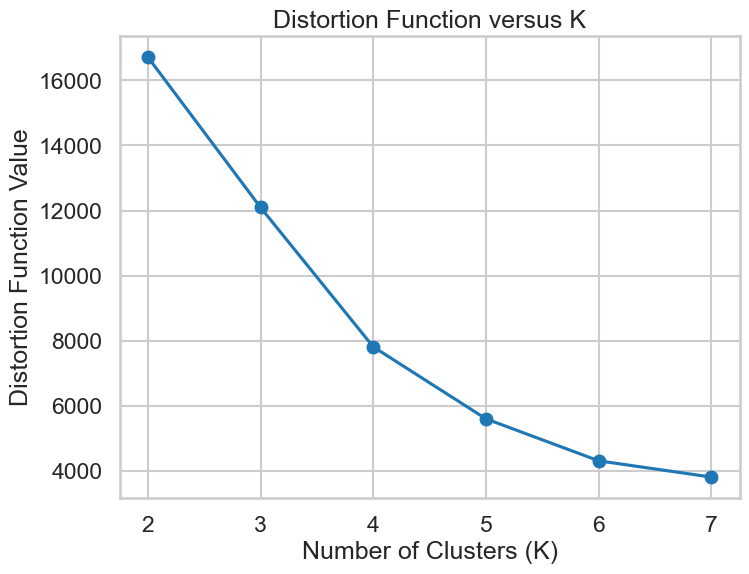

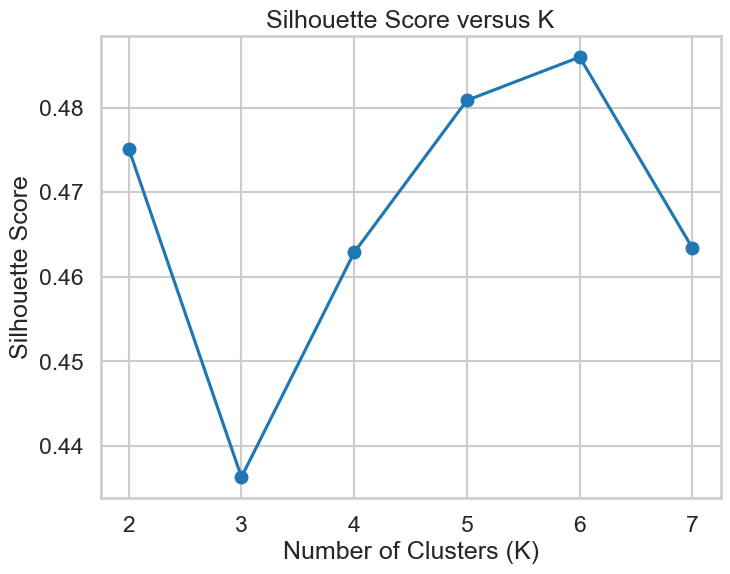

In [6]:
# using Kmeans with different values of K 
#>> for store distortion and silhouette to graph it versus K 
distortions = []
silhouette_scores = []
# K Range 
k_range = range(2, 8)
# Loop through different values of K
for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Multi_blob_Data)
    
    # cluster assignments and centroids
    cluster_assignments = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    # Calculate distortion function 
    distortion = kmeans.inertia_
    distortions.append(distortion)
    
    # Calculate silhouette score
    silhouette = silhouette_score(Multi_blob_Data, cluster_assignments)
    silhouette_scores.append(silhouette)
    
    # Display outcome for each value of K
    plt.figure(figsize=(8, 4))
    plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=100)
    plt.title(f'K-means Clustering with K={k}')
    plt.show()
    
# Plot distortion function versus K
plt.figure(figsize=(8, 6))
plt.plot(k_range, distortions, marker='o')
plt.title('Distortion Function versus K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion Function Value')
plt.grid(True)
plt.show()

# Plot silhouette score versus K
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score versus K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [7]:
# for plotting dendogram
def plot_dendrogram(model, **kwargs):
    children = model.children_
    distance = np.arange(children.shape[0])
    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [8]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# the data 
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")
sns.set_context("talk")
n_bins = 6
centers = [(-3, -3), (0, 0), (5, 2.5), (-1, 4), (4, 6), (9, 7)]
Multi_blob_Data, y = make_blobs(n_samples=[100, 150, 300, 400, 300, 200], n_features=2,cluster_std=[1.3, 0.6, 1.2, 1.7, 0.9, 1.7], centers=centers,shuffle=False, random_state=42)


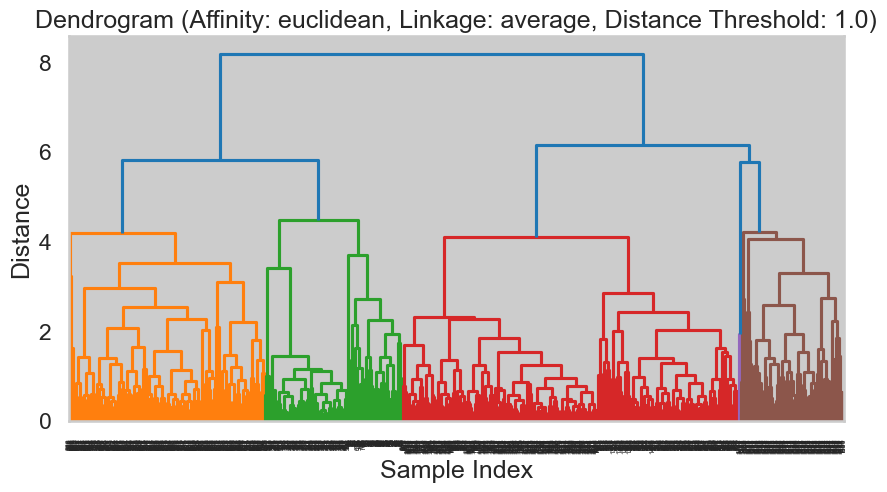

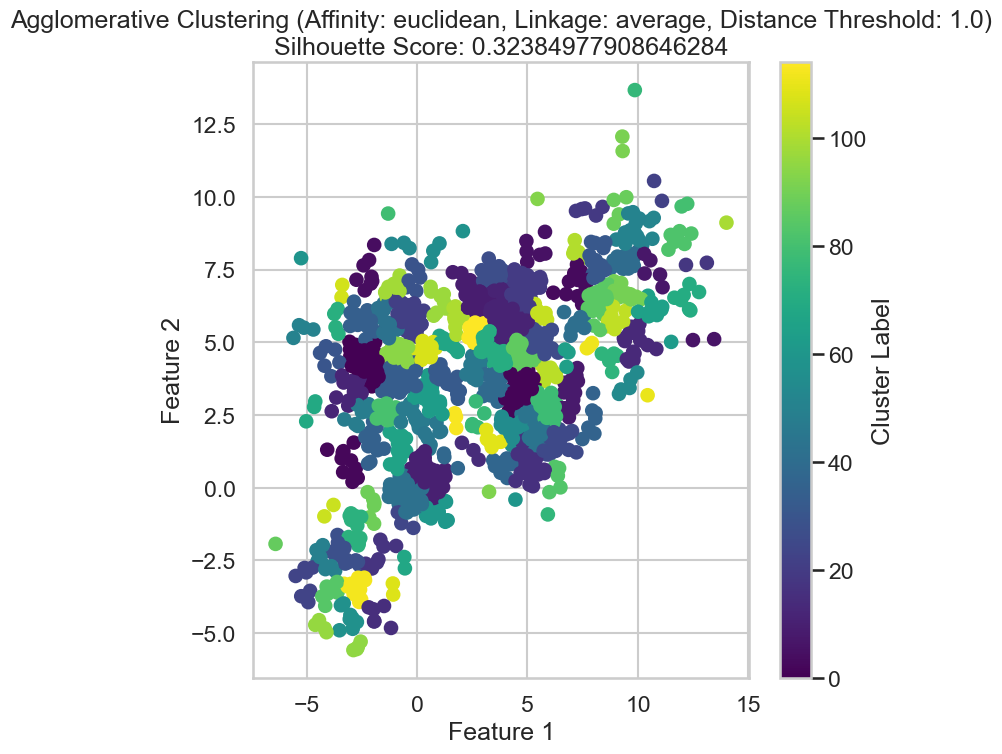

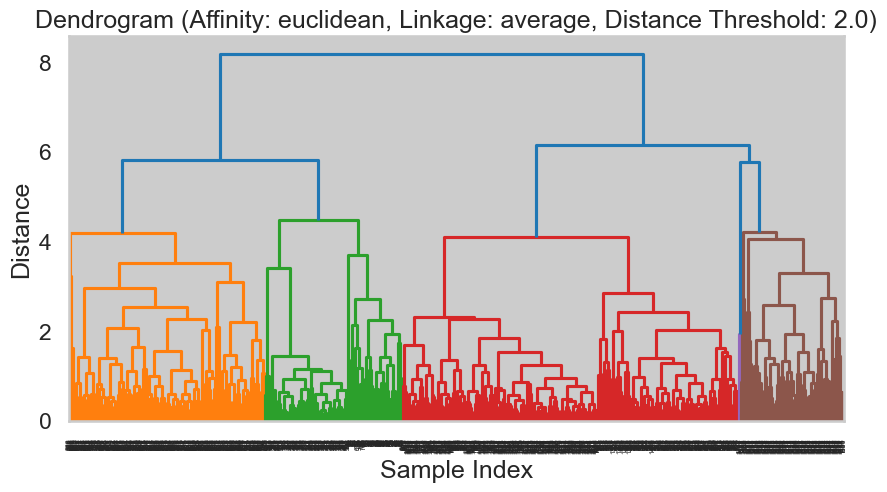

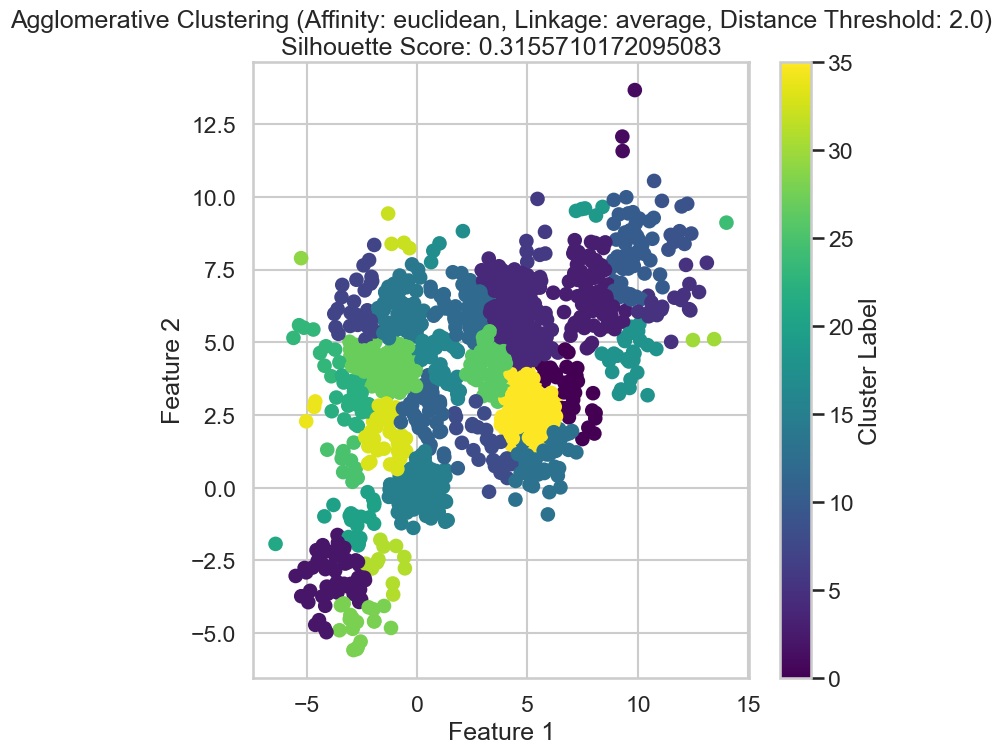

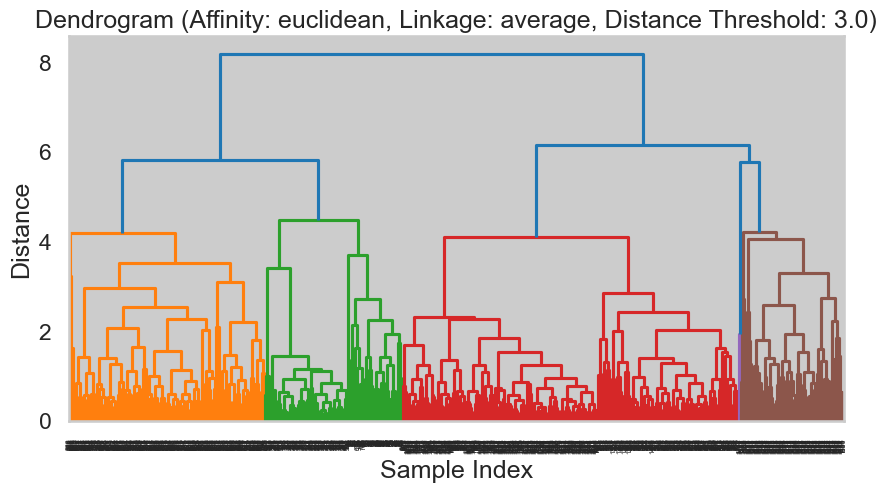

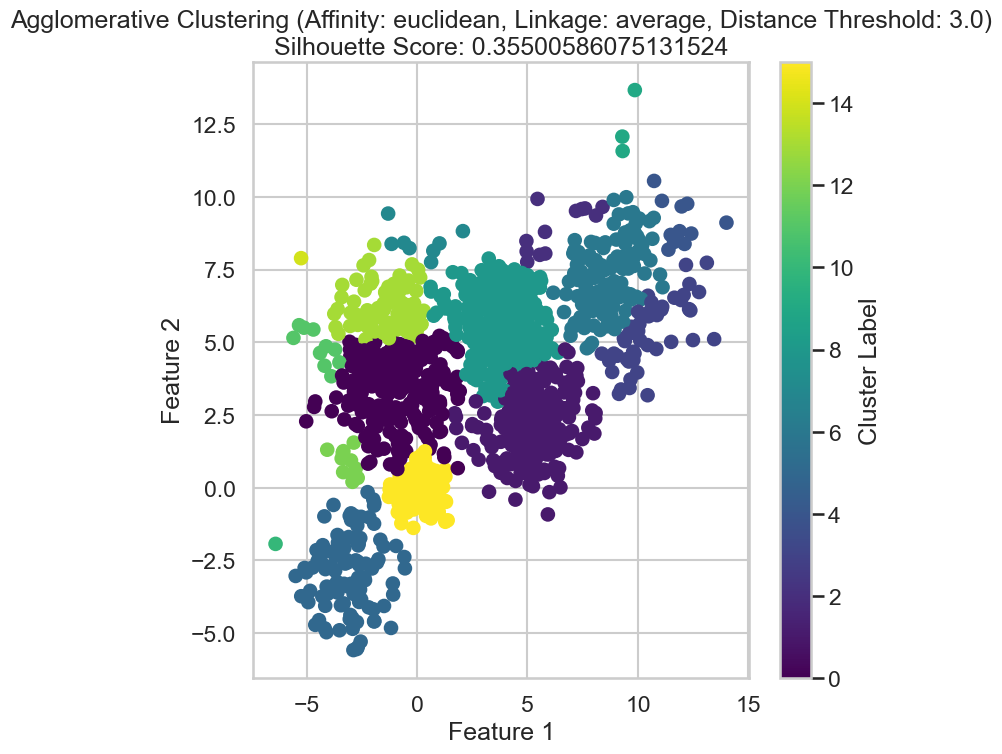

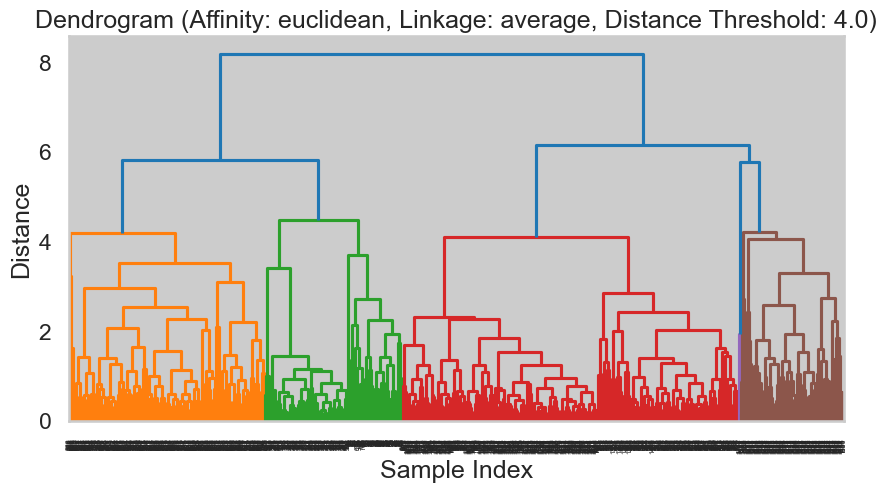

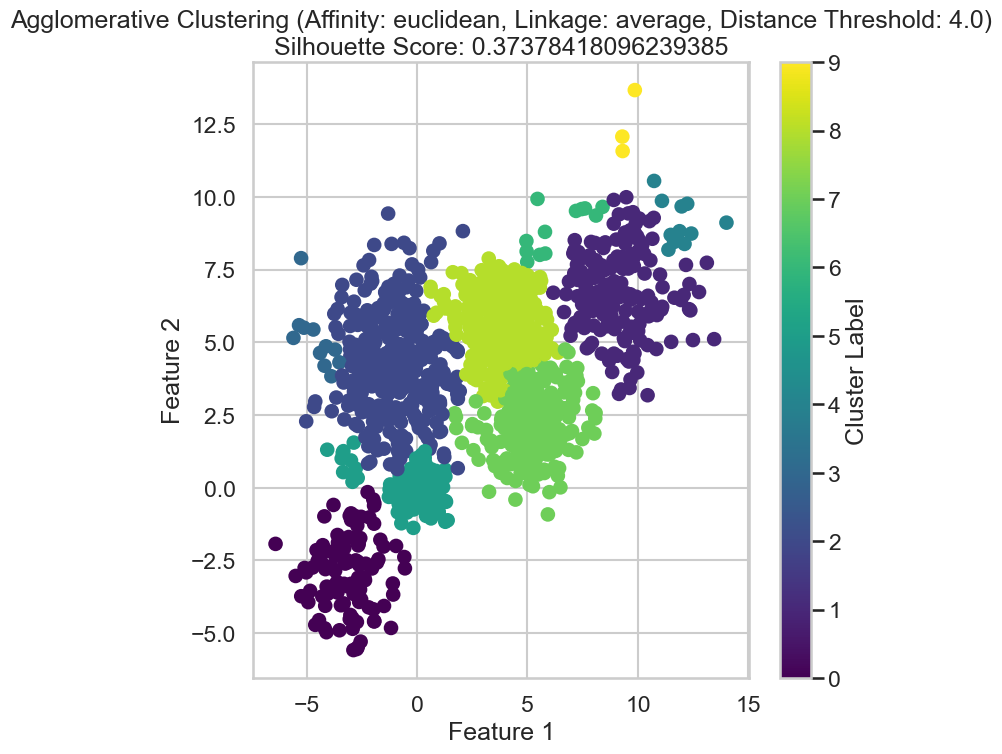

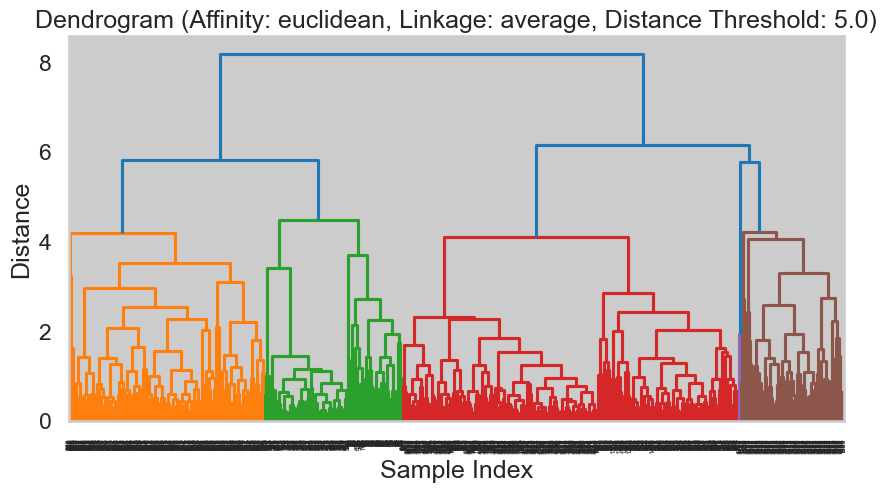

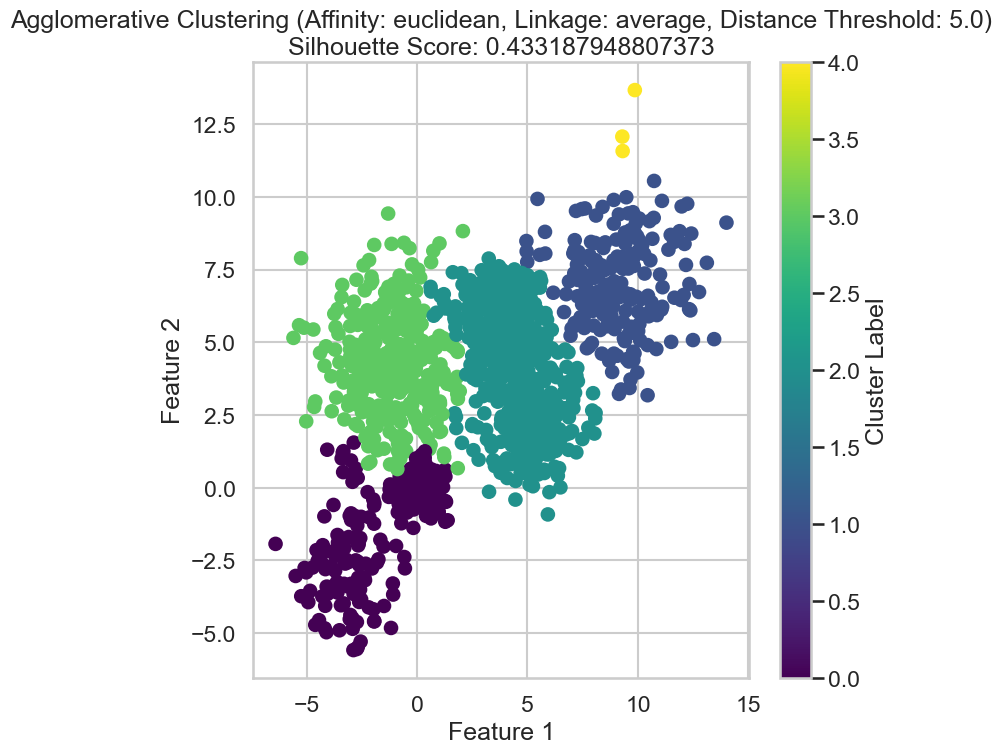

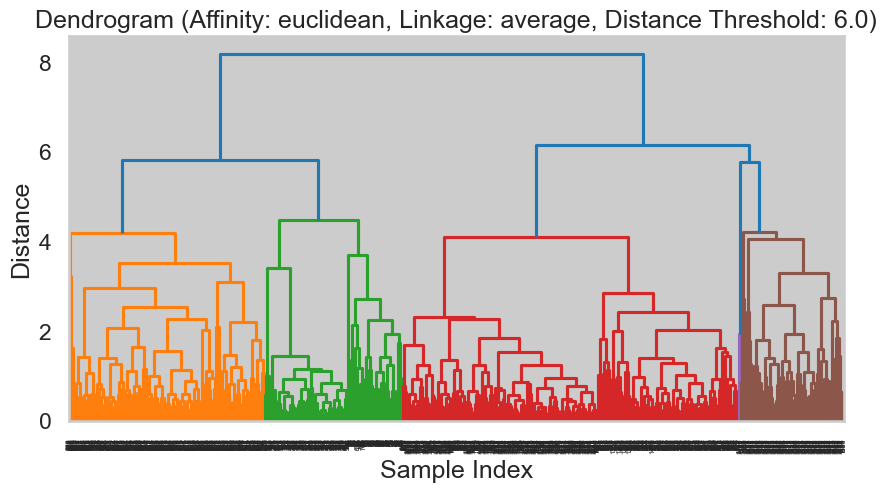

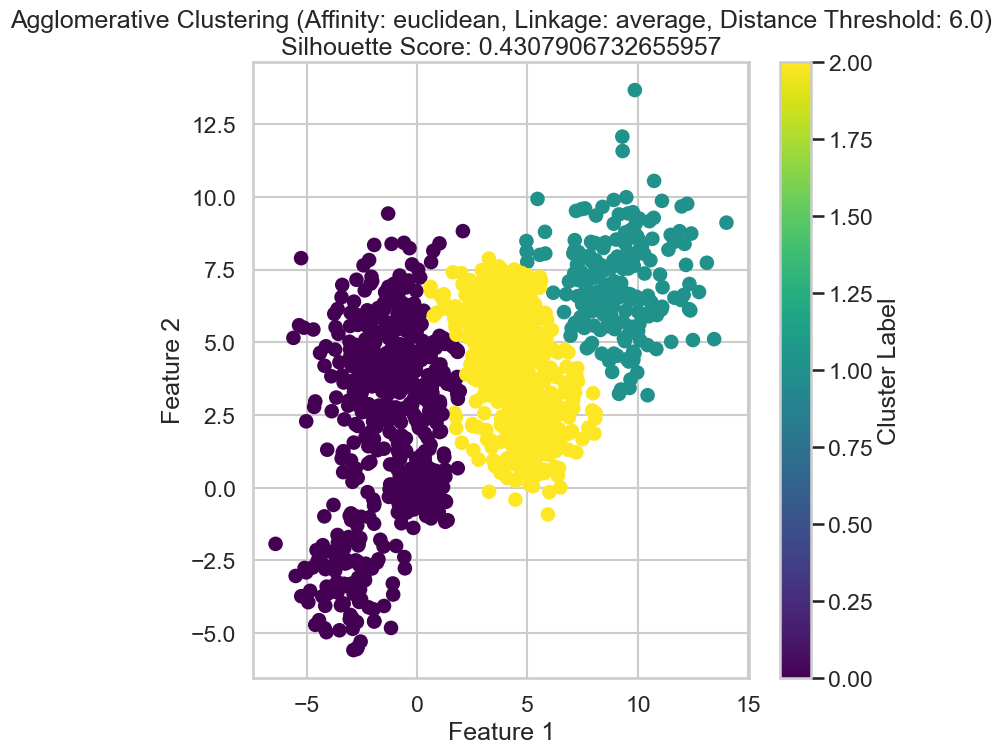

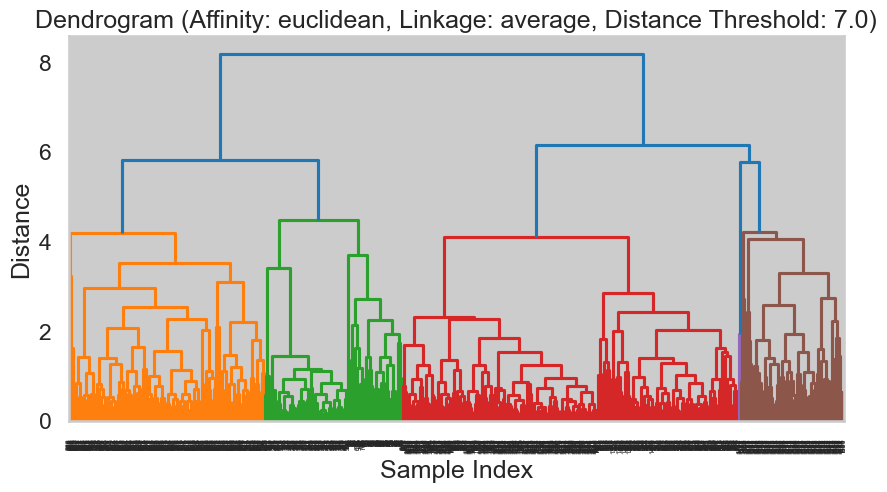

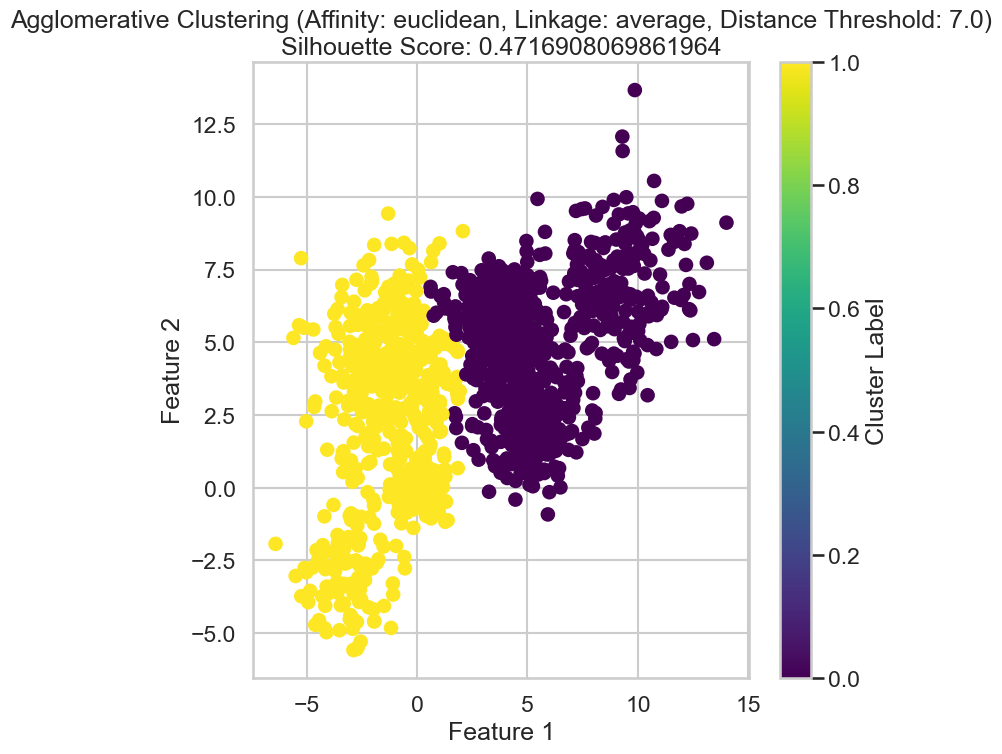

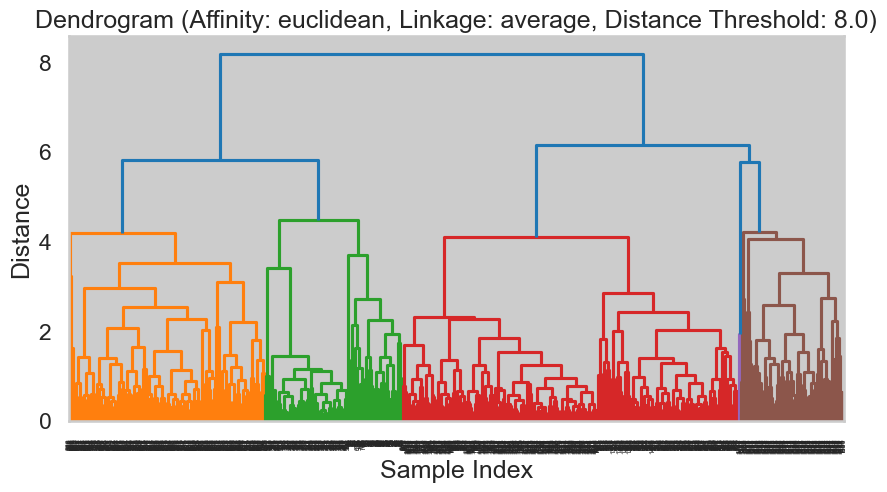

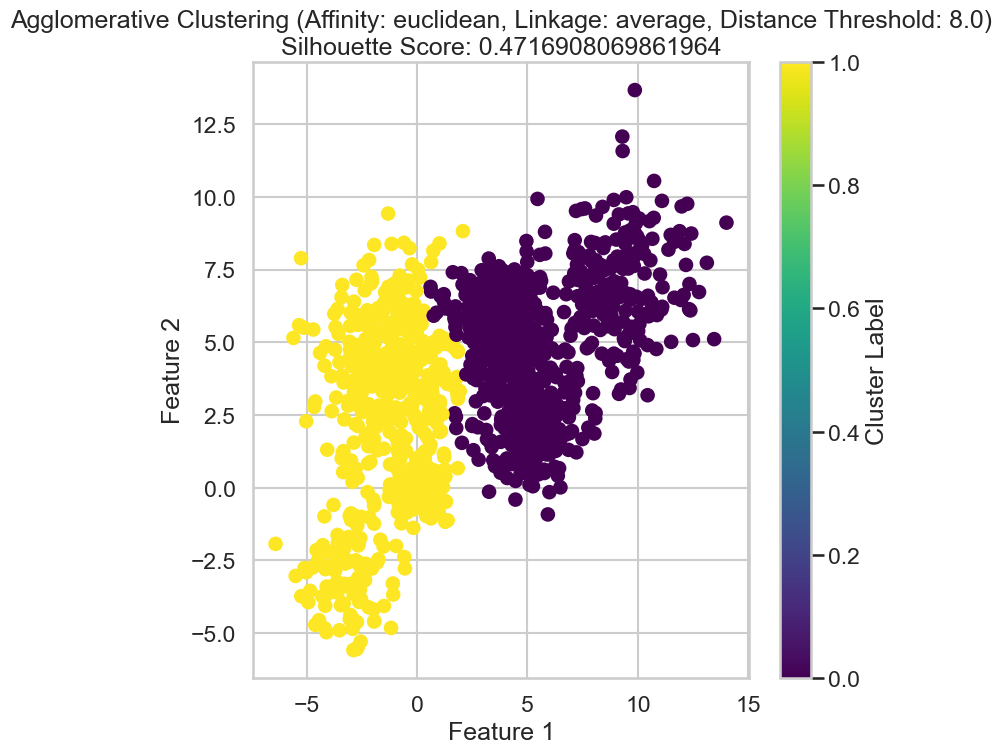

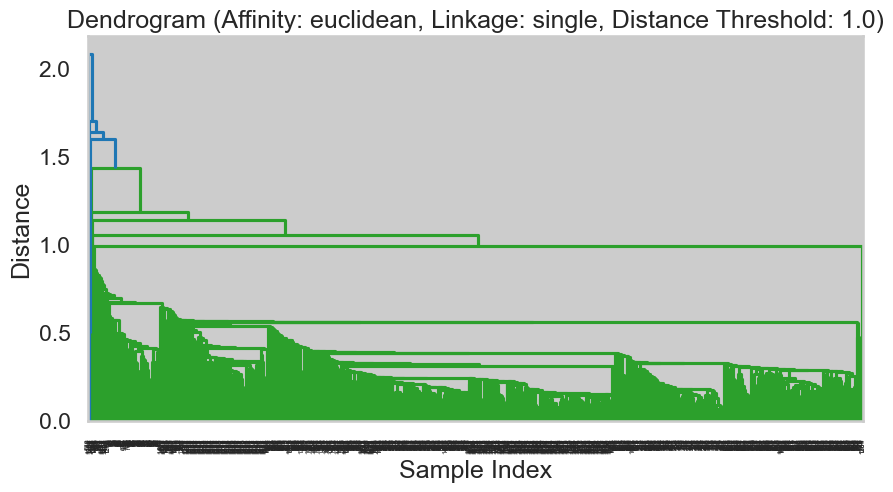

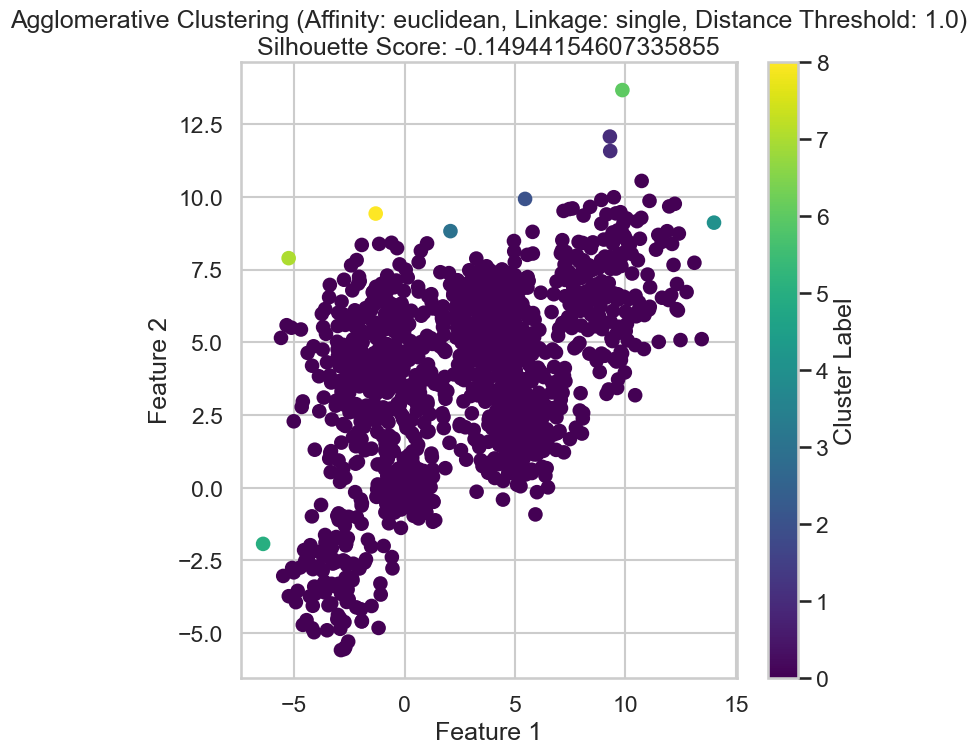

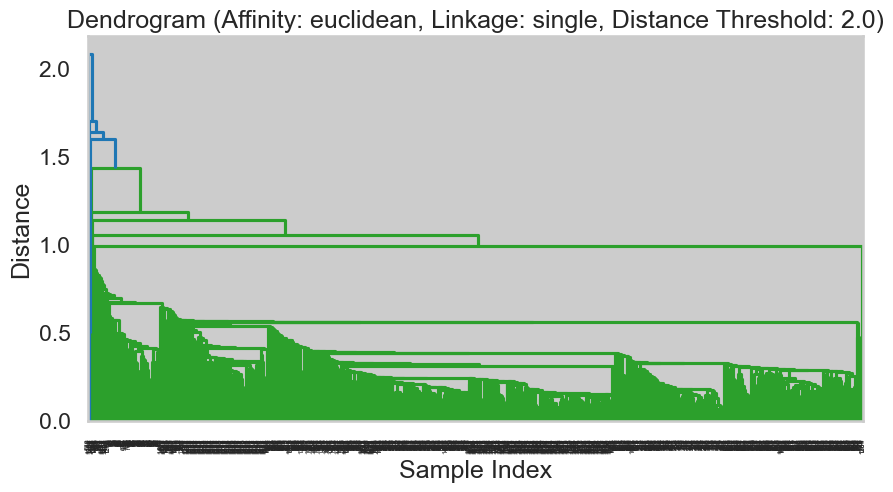

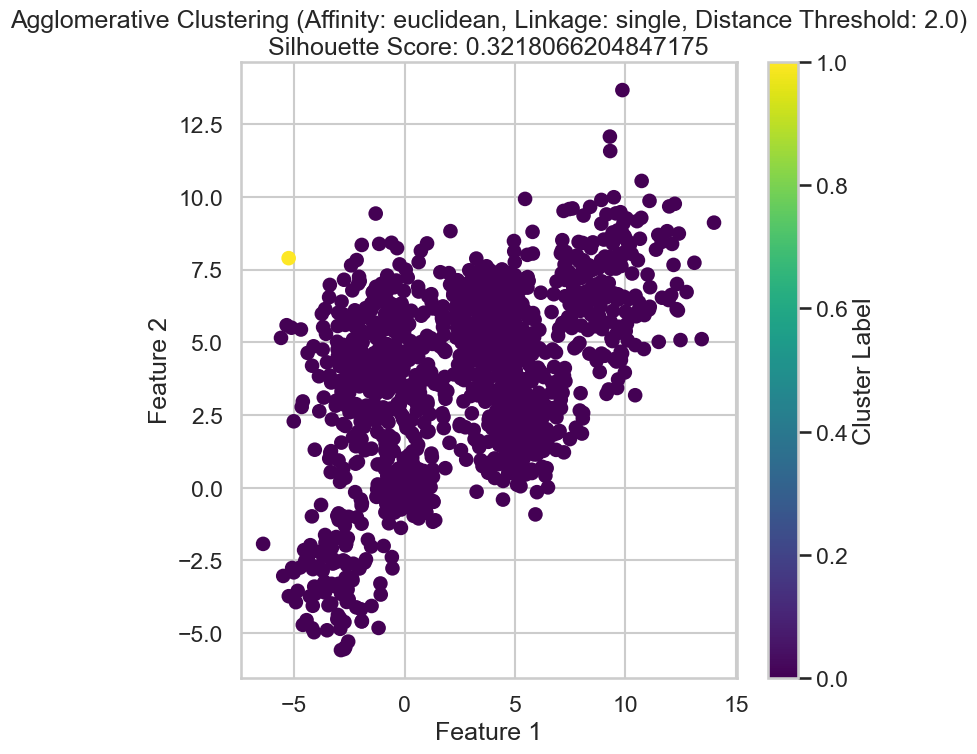

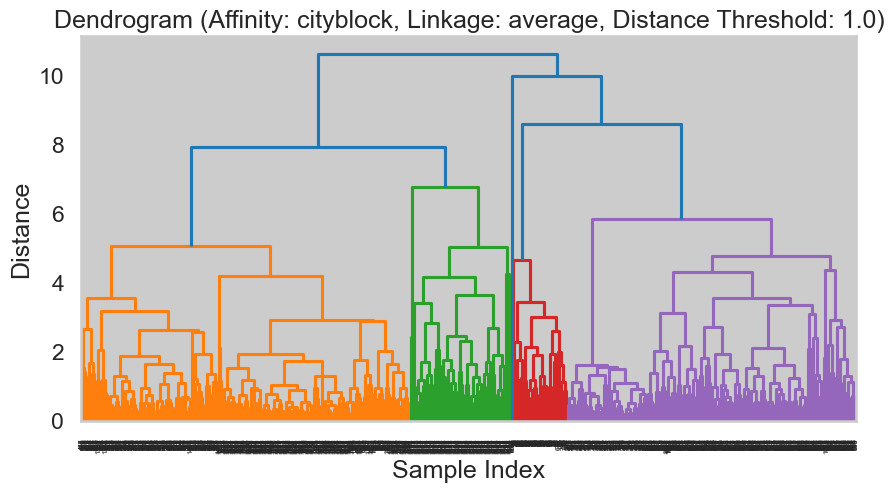

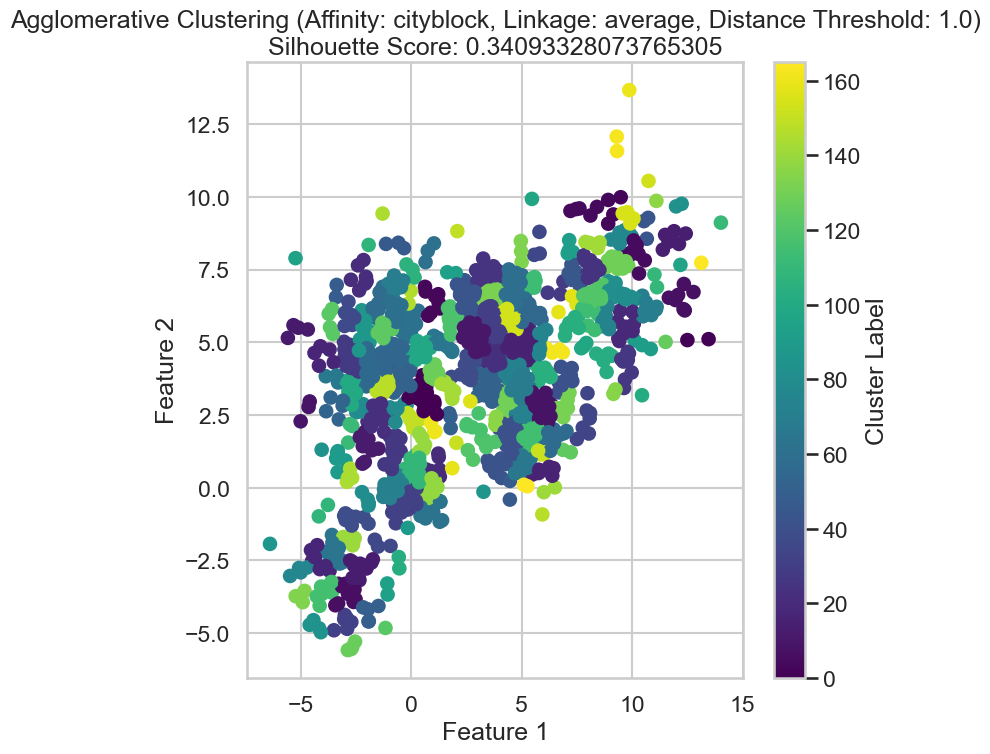

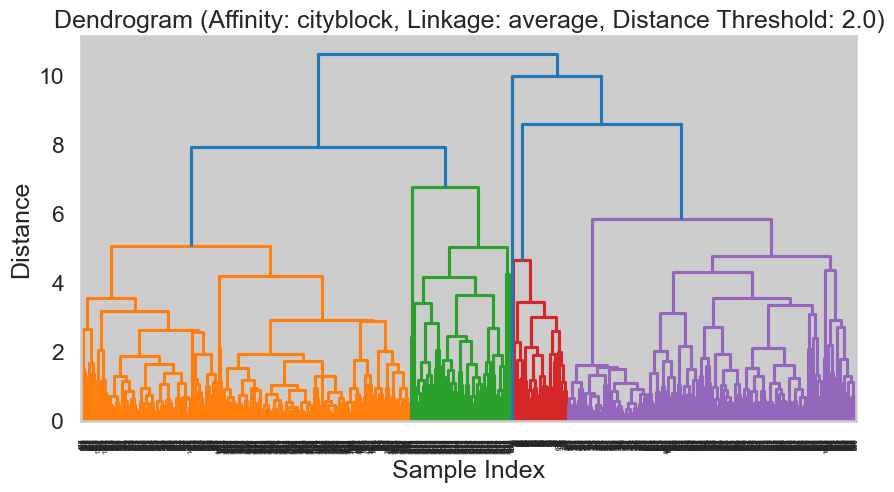

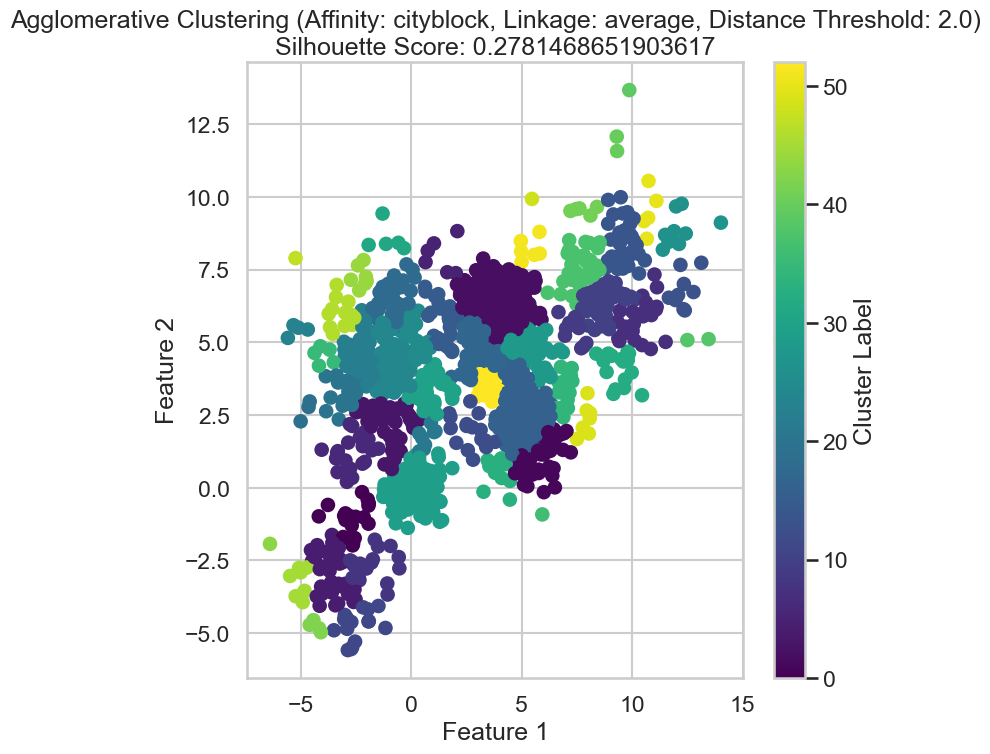

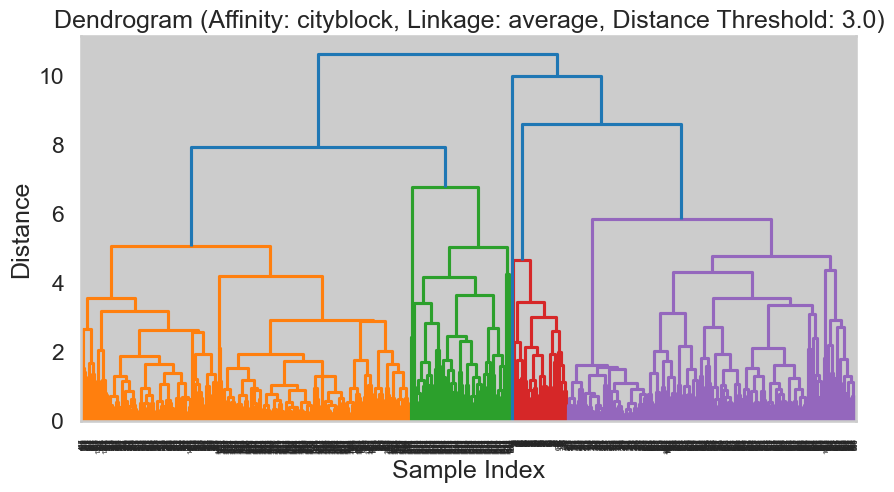

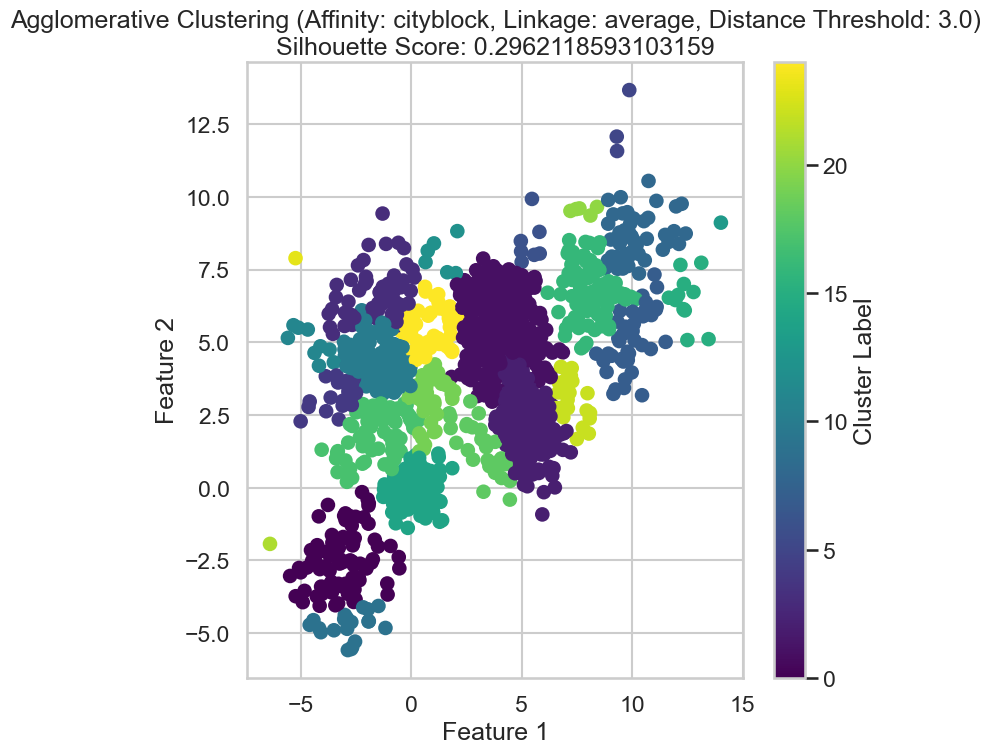

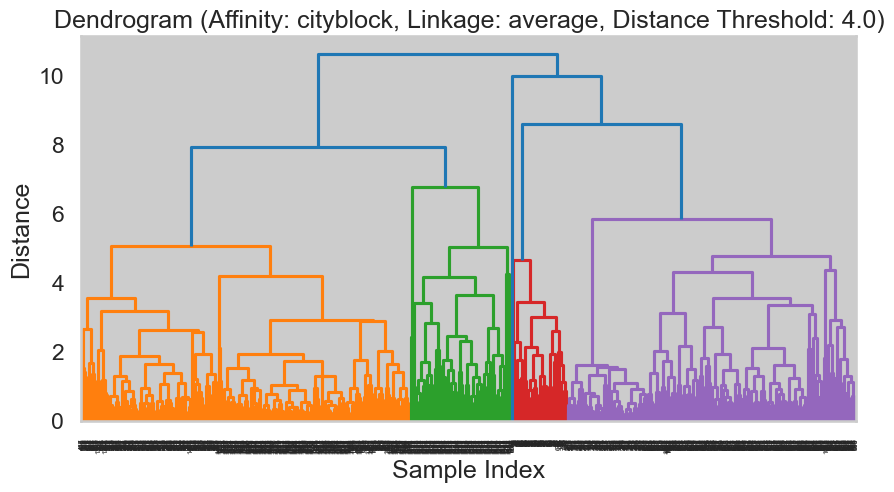

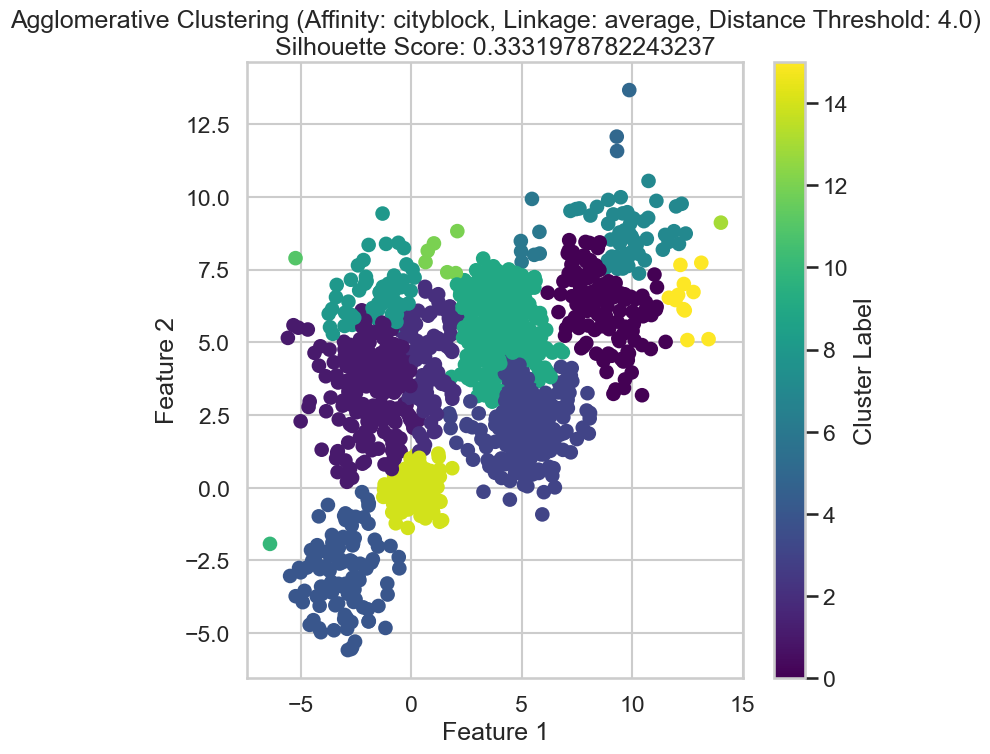

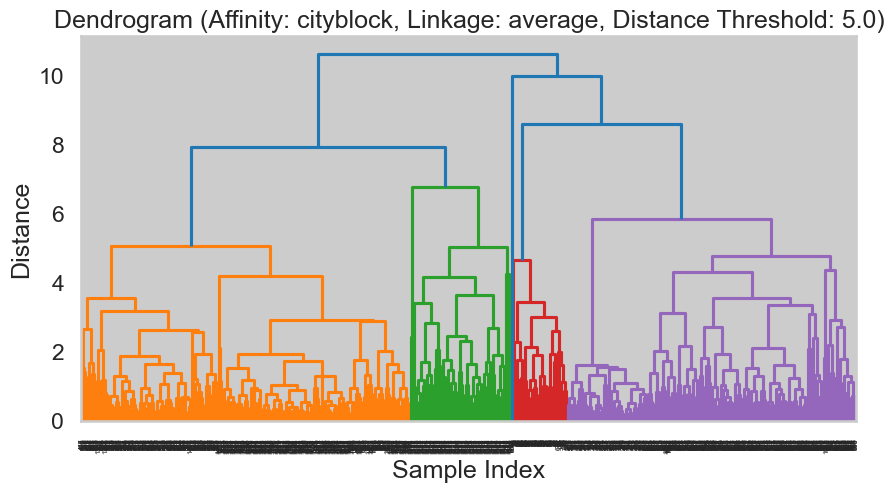

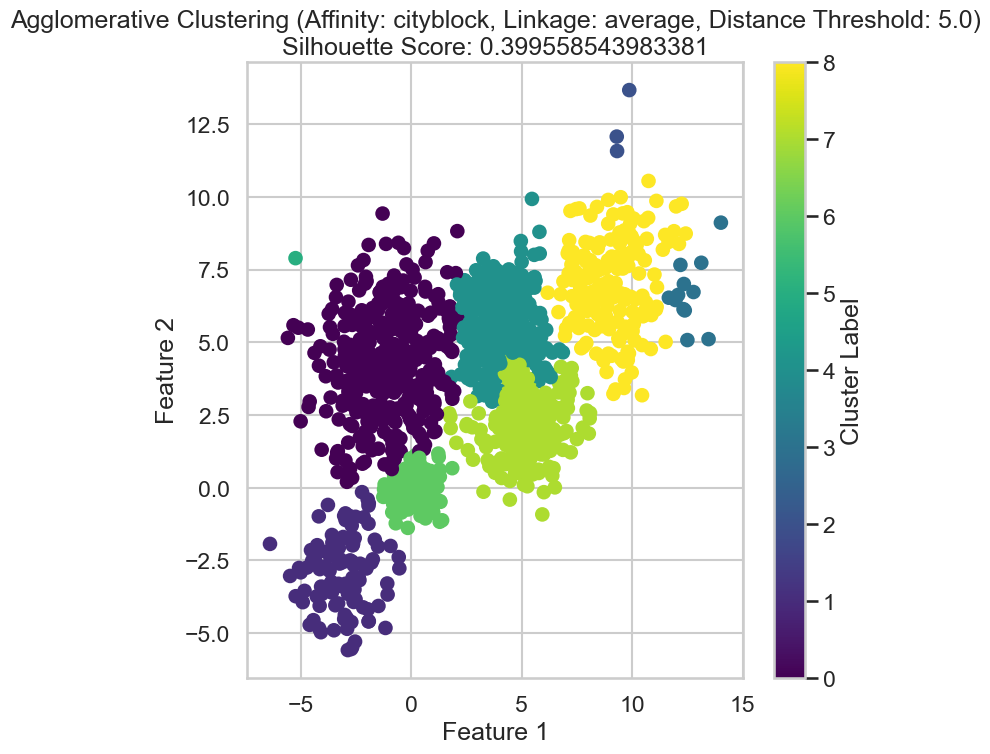

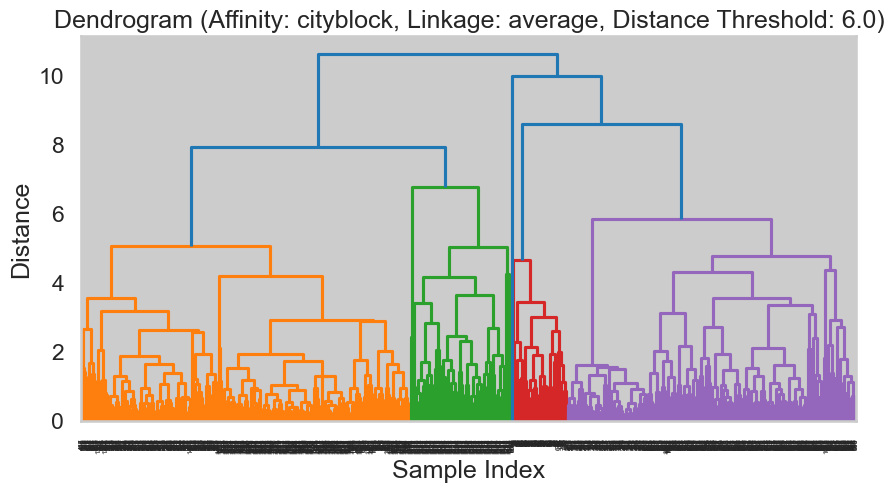

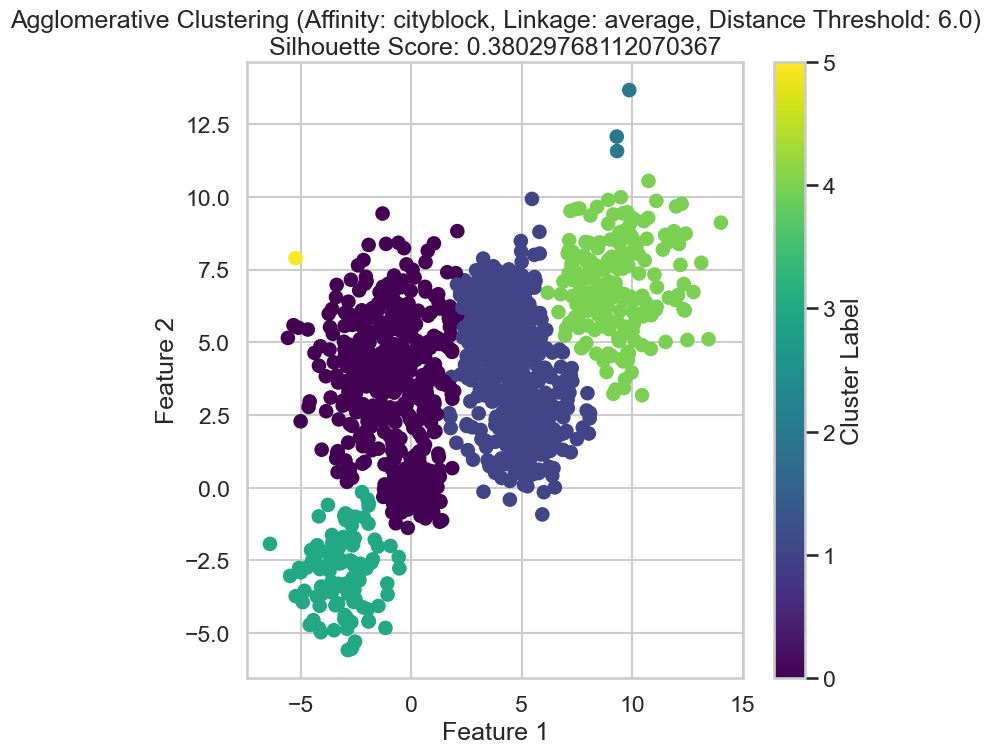

In [ ]:
#function to perform Agglomerative Clustering with different parameters
from scipy.cluster.hierarchy import dendrogram, linkage

def perform_agglomerative_clustering(data, affinity_list, linkage_list, distance_threshold_list):
    best_silhouette_score = -1
    best_params = {}

    for affinity in affinity_list:
        for linkage_method in linkage_list:
            for distance_threshold in distance_threshold_list:
                # Perform Agglomerative Clustering
                model = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage_method, distance_threshold=distance_threshold)
                cluster_labels = model.fit_predict(data)
                
                # Check if more than one unique label is present
                unique_labels = np.unique(cluster_labels)
                if len(unique_labels) > 1:
                    # Plot dendrogram
                    plt.figure(figsize=(10, 5))
                    plt.title(f'Dendrogram (Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold})')
                    linkage_matrix = linkage(data, method=linkage_method, metric=affinity)
                    dendrogram(linkage_matrix)
                    plt.xlabel('Sample Index')
                    plt.ylabel('Distance')
                    plt.show()

                    # Calculate silhouette score
                    silhouette_avg = silhouette_score(data, cluster_labels)
                    
                    # Display clusters
                    plt.figure(figsize=(8, 8))
                    plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
                    plt.title(f'Agglomerative Clustering (Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold})\nSilhouette Score: {silhouette_avg}')
                    plt.xlabel('Feature 1')
                    plt.ylabel('Feature 2')
                    plt.colorbar(label='Cluster Label')
                    plt.show()

                    # Store best silhouette score and parameters
                    if silhouette_avg > best_silhouette_score:
                        best_silhouette_score = silhouette_avg
                        best_params = {'Affinity': affinity, 'Linkage': linkage_method, 'Distance Threshold': distance_threshold}

    print("Best Silhouette Score:", best_silhouette_score)
    print("Best Parameters:", best_params)

# Define the lists of parameters to try
affinity_list = ['euclidean', 'cityblock', 'cosine'] 
linkage_list = ['average', 'single']
distance_threshold_list = np.linspace(1, 10, 10)

# Perform Agglomerative Clustering with different parameters
perform_agglomerative_clustering(Multi_blob_Data, affinity_list, linkage_list, distance_threshold_list)


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [ ]:
from sklearn.cluster import DBSCAN

def perform_dbscan_clustering(data, eps_list, min_samples_list):
    best_silhouette_score = -1
    best_params = {}

    for eps in eps_list:
        for min_samples in min_samples_list:
            # Perform DBSCAN Clustering
            model = DBSCAN(eps=eps, min_samples=min_samples)
            cluster_labels = model.fit_predict(data)

            # Check if more than one unique label is present
            unique_labels = np.unique(cluster_labels)
            if len(unique_labels) > 1:
                # Calculate silhouette score
                silhouette_avg = silhouette_score(data, cluster_labels)

                # Display clusters
                plt.figure(figsize=(8, 8))
                plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
                plt.title(f'DBSCAN Clustering (EPS: {eps}, Min Samples: {min_samples})\nSilhouette Score: {silhouette_avg}')
                plt.xlabel('Feature 1')
                plt.ylabel('Feature 2')
                plt.colorbar(label='Cluster Label')
                plt.show()

                # Store best silhouette score and parameters
                if silhouette_avg > best_silhouette_score:
                    best_silhouette_score = silhouette_avg
                    best_params = {'EPS': eps, 'Min Samples': min_samples}

    print("Best Silhouette Score:", best_silhouette_score)
    print("Best Parameters:", best_params)


# lists of parameters to try
eps_list = np.linspace(0.1, 3, 10)
min_samples_list = np.arange(5, 26, 5)

# Perform DBSCAN Clustering
perform_dbscan_clustering(Multi_blob_Data, eps_list, min_samples_list)


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [ ]:
from sklearn.mixture import GaussianMixture
def perform_gaussian_mixture_clustering(data, covariance_types):
    for covariance_type in covariance_types:
        # Fit Gaussian Mixture Model
        gmm = GaussianMixture(n_components=len(data), covariance_type=covariance_type, random_state=42)
        gmm.fit(data)

        # Generate meshgrid for contour plot
        x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
        y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))
        Z = -gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot contour plot
        plt.figure()
        plt.contourf(xx, yy, Z, cmap='viridis')
        plt.scatter(data[:, 0], data[:, 1], s=5, color='black')
        plt.title(f'GMM Clustering (Covariance Type: {covariance_type})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.colorbar(label='Density')
        plt.show()


In [ ]:
#change the covariance_type and check the difference in the resulting proabability fit
covariance_types = ['full', 'tied', 'diag', 'spherical']
perform_gaussian_mixture_clustering(Multi_blob_Data, covariance_types)


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

# 1. Kmeans


In [ ]:
def perform_kmeans_clustering(data, k_values):
    silhouette_scores = []
    distortions = []
    best_silhouette_score = -1
    best_k = None
    
    for k in k_values:
        # Fit KMeans model
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        
        # Calculate distortion
        distortions.append(kmeans.inertia_)
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
        
        # Store the best silhouette score and corresponding k value
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_k = k
            
        # Plot cluster centers and data points
        plt.figure(figsize=(8, 6))
        plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Cluster Centers')
        plt.title(f'Number of clusters (K): {k}\nSilhouette Score: {silhouette_avg:.2f}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()
        
    # Plot distortion function versus K
    plt.plot(k_values, distortions, marker='o')
    plt.title('Distortion vs Number of Clusters (K)')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Distortion')
    plt.show()
    
    # Plot silhouette score versus K
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.title('Silhouette Score vs Number of Clusters (K)')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.show()
    
    return best_k, best_silhouette_score


In [ ]:
k_values = range(2, 11)
best_k, best_silhouette_score = perform_kmeans_clustering(iris_data.data, k_values)
print(f'Best K: {best_k}')
print(f'Best Silhouette Score: {best_silhouette_score}')


# 2.Hierarchal Clustering

In [ ]:
perform_agglomerative_clustering(iris_data.data, affinity_list, linkage_list, distance_threshold_list)


# 3.DBScan

In [ ]:
# Perform DBSCAN Clustering
perform_dbscan_clustering(iris_data.data, eps_list, min_samples_list)

# 4.Gaussian MixtureGaussian Mixture

In [ ]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris_data = load_iris()

# Extract features from Iris dataset
iris_features = iris_data.data[:, :2]  # Only use first two features (sepal length and sepal width)

# Display the shape of the features
print("Iris Features Shape:", iris_features.shape)

# Perform Gaussian Mixture clustering
perform_gaussian_mixture_clustering(iris_features, covariance_types)


# Normalizing the data 

# Kmeans clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
iris_features = iris_data.data

# Normalize the features using StandardScaler
scaler = StandardScaler()
iris_features_normalized = scaler.fit_transform(iris_features)

# Display the shape of the normalized features
print("Normalized Iris Features Shape:", iris_features_normalized.shape)
#Kmeans clustering 
k_values = range(2, 11)
best_k, best_silhouette_score = perform_kmeans_clustering(iris_features_normalized, k_values)
print(f'Best K: {best_k}')
print(f'Best Silhouette Score: {best_silhouette_score}')

# Hierarchal Clustering

In [ ]:
perform_agglomerative_clustering(iris_features_normalized, affinity_list, linkage_list, distance_threshold_list)

# Dbscan clustering

In [ ]:
perform_dbscan_clustering(iris_features_normalized, eps_list, min_samples_list)

# Gaussian Mixture clustering

In [ ]:
# Extract features from Iris dataset
iris_features = iris_data.data[:, :2]  # Only use first two features (sepal length and sepal width)

# Display the shape of the features
print("Iris Features Shape:", iris_features.shape)
iris_features_normalized = scaler.fit_transform(iris_features)

# Perform Gaussian Mixture clustering
perform_gaussian_mixture_clustering(iris_features_normalized, covariance_types)


## Customer dataset
Repeat all the above on the customer data set 

In [ ]:
df = pd.read_csv("C:/Users/Sally/OneDrive/Desktop/Customer data.csv")
df.head()

In [ ]:
data = df.drop(columns=['ID'])
data_matrix = data.values

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_matrix)
reduced_data

In [ ]:
x = [point[0] for point in reduced_data]
y = [point[1] for point in reduced_data]

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.xlabel('Featuer 1')
plt.ylabel('Featuer 2')
plt.title('Reduced Data Plot')
plt.grid(True)
plt.show()

# Kmeans clustring

In [ ]:
#Kmeans clustering 
k_values = range(2, 11)
best_k, best_silhouette_score = perform_kmeans_clustering(reduced_data, k_values)
print(f'Best K: {best_k}')
print(f'Best Silhouette Score: {best_silhouette_score}')

# Hierarchal Clustering

In [ ]:
perform_agglomerative_clustering(reduced_data, affinity_list, linkage_list, distance_threshold_list)

# Dbscan clustering

In [ ]:
perform_dbscan_clustering(reduced_data, eps_list, min_samples_list)

# Gaussian Mixture clustering

In [ ]:
def Gaussian_cluster(data):
    covariance_types = ['full', 'tied', 'diag', 'spherical']
    
    # Function to plot contours
    def plot_contours(ax, model, X):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        Z = -model.score_samples(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contour(xx, yy, Z, levels=10, linewidths=1, colors='k')
    
    # Perform GMM clustering with different covariance types
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.flatten()
    for i, cov_type in enumerate(covariance_types):
        gmm = GaussianMixture(n_components=3, covariance_type=cov_type, random_state=42)
        gmm.fit(data)  # Here, pass the actual data array
        ax = axs[i]
        plot_contours(ax, gmm, data)  # Pass data instead of iris_data
        ax.scatter(data[:, 0], data[:, 1], marker='.', s=30, lw=0, alpha=0.7)  # Pass data instead of iris_data
        ax.set_title(f'Covariance Type: {cov_type}')
    plt.tight_layout()
    plt.show()


Gaussian_cluster(reduced_data)

